# **Project : Telecom churn analysis**

**Project Type** - EDA\
**Contribution** - Individual

# **Project description**

Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer cancelled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

# **Problem satement**

In the telecom field, companies often face a high rate of customer churn (customers leaving the company). It's a big issue as it's easier to retain existing customers than acquire new ones.

The goal in this case is simple:

"We need to figure out which customers might leave us in the future."

Using data about each customer's usage of different services, their account information (how long they've been a customer, their charges), we're going to create a model that predicts which customers are most likely to leave next.

By identifying these customers, the company will be able to target them with special offers or incentives and hopefully prevent them from leaving.

# **Dataset loading**

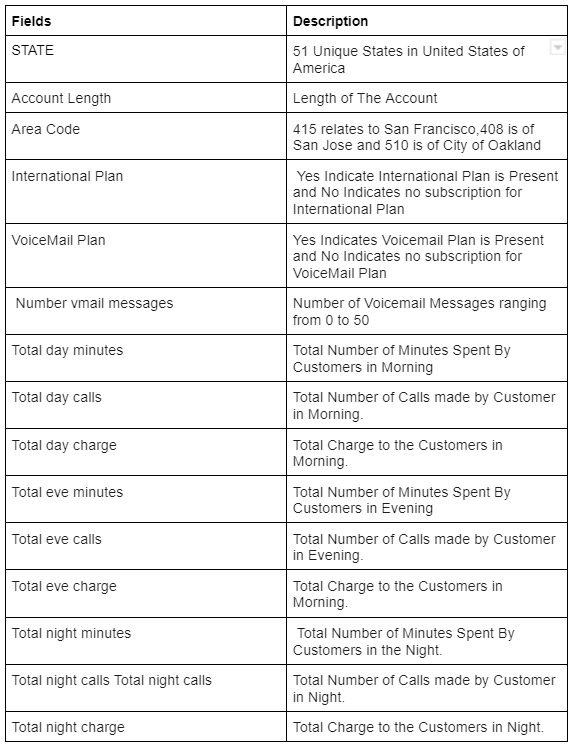

# **importing libraries and mounting drive.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Capstone/telecom_chum/TelecomChurn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title **Making a copy of data**
df =df.copy() #making a copy of dataset

In [ ]:
df.head() #first five rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# **Dataset info**

In [ ]:
 #information about column and datatype with if it is contained null count.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# **Rows and Columns count**

In [ ]:
print('Rows :',df.shape[0])
print('Cols :',df.shape[1])

Rows : 3333
Cols : 20


# **Duplicate values**

In [ ]:
#Dropping duplicates.
print(df.drop_duplicates(inplace=True))
#none duplicates found.

None


# **Missing Null Values**

In [ ]:
print(df.isnull().sum())
print(df.isna().sum())
#no null values.

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total i

# **Heatmap**

<Axes: >

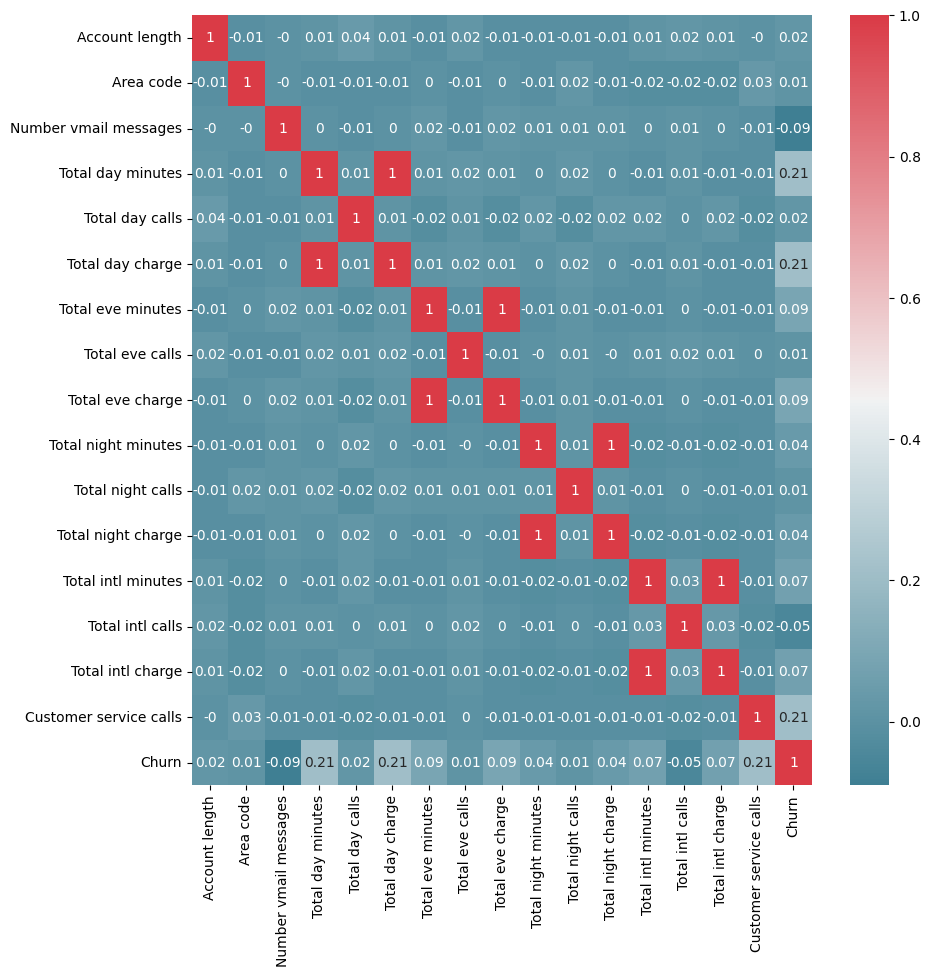

In [ ]:
plt.figure(figsize =(10,10))
cmap = sns.diverging_palette(220,10, as_cmap= True)
sns.heatmap(np.round(df.corr(),2),annot = True, cmap=cmap)

# **What do you know about your dataset ?**

*   There are no missing and duplicate data
*   From the heatmap we can see **Total day charge and Total day minutes**, **Total eve charge and Total eve minutes**, **Total night charge and Total night minutes** and **Total intl charge and Total intl minutes** are correlated.
*   The Dataset contain 3333 rows and 20 columns.



# **2.Understanding variable.**

In [ ]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [ ]:
#load dataset
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


# **Variable description**


**Checking unique values**

In [ ]:
#df check unique value for each variable
for col in df.columns:
  print('variable :-',col, 'has', df[col].nunique(), 'unique values.')


variable :- State has 51 unique values.
variable :- Account length has 212 unique values.
variable :- Area code has 3 unique values.
variable :- International plan has 2 unique values.
variable :- Voice mail plan has 2 unique values.
variable :- Number vmail messages has 46 unique values.
variable :- Total day minutes has 1667 unique values.
variable :- Total day calls has 119 unique values.
variable :- Total day charge has 1667 unique values.
variable :- Total eve minutes has 1611 unique values.
variable :- Total eve calls has 123 unique values.
variable :- Total eve charge has 1440 unique values.
variable :- Total night minutes has 1591 unique values.
variable :- Total night calls has 120 unique values.
variable :- Total night charge has 933 unique values.
variable :- Total intl minutes has 162 unique values.
variable :- Total intl calls has 21 unique values.
variable :- Total intl charge has 162 unique values.
variable :- Customer service calls has 10 unique values.
variable :- Chur

# **Data visualization & EDA**

**Data visualization, data wrangling and storytelling is done while doing EDAs**

**1.Checking how many customer churn the company**

note - false = churned and true = non churned


In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

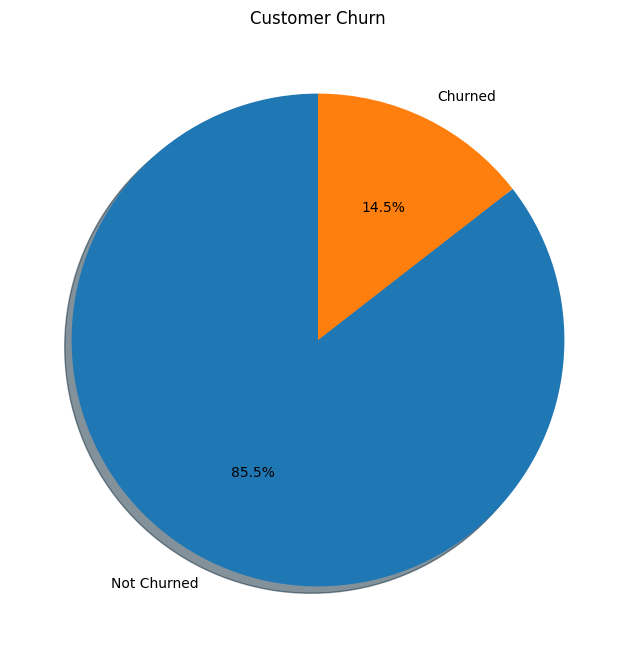

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df['Churn'].value_counts(), labels=['Not Churned', 'Churned'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title('Customer Churn')
plt.show()


So as we can see 14.5% people churned and remaining 85.5% have not churned.

**2. Checking churn rate area code wise**

In [ ]:
print("unique area code :",df['Area code'].unique())

areachurn = df.groupby(['Area code'])['Churn'].value_counts().unstack()
areachurn

unique area code : [415 408 510]


Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


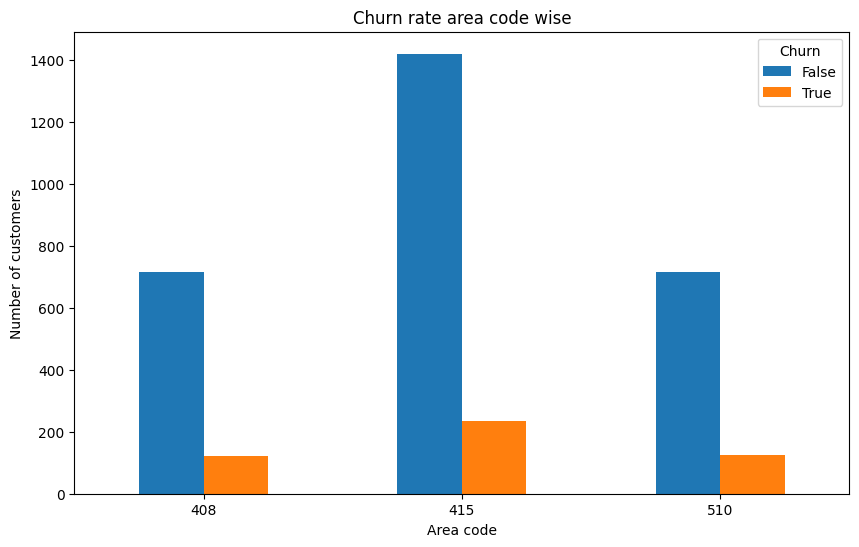

In [ ]:
#plotting bar

areachurn.plot.bar(figsize=(10,6))
plt.xticks(rotation = 360)
plt.title('Churn rate area code wise')
plt.xlabel('Area code')
plt.ylabel('Number of customers')
plt.show()


**Observation**\
Area code **415** has highest churn rate compared to other states.

**3.Checking churn rate state wise**

In [ ]:
df['State'].unique()


array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
Statechurn = df.groupby(['State'])['Churn'].value_counts().unstack()
Statechurn.head()

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9


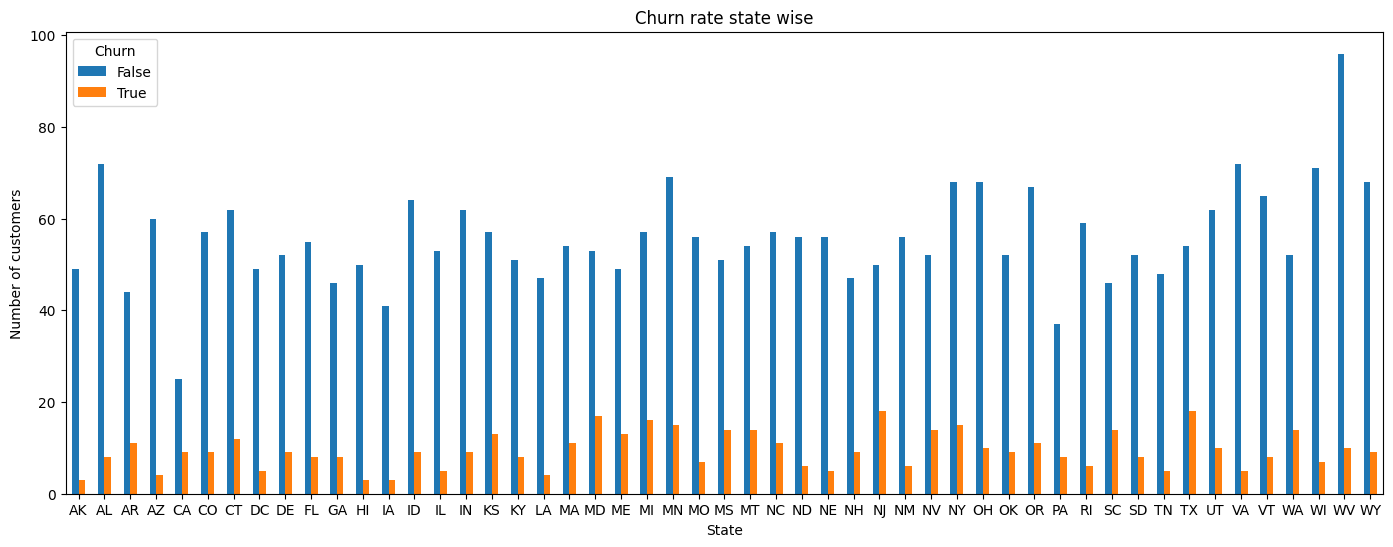

In [ ]:
#plotting bar

Statechurn.plot.bar(figsize=(17,6))
plt.xticks(rotation = 360)
plt.title('Churn rate state wise')
plt.xlabel('State')
plt.ylabel('Number of customers')
plt.show()


**4.International plan**

In [ ]:
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

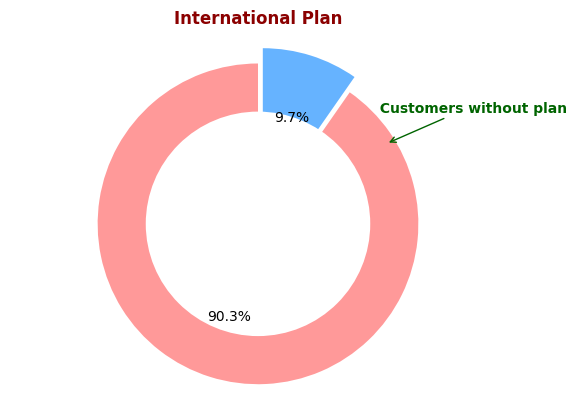

In [ ]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['No', 'Yes']
sizes = df['International plan'].value_counts()

# Colors
colors = ['#ff9999','#66b3ff']

# Explode out the 'Yes' slice
explode = (0, 0.1)

# Create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Draw white circle in the middle for 'donut' style
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Annotation
ax1.annotate( '  Customers without plan',
             xy=(0.8, 0.5), xycoords='data',
             xytext=(0.7, 0.7), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3", color='darkgreen'),
             color='darkgreen', weight='bold'
            )

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

plt.title('International Plan', color = 'darkred', weight ='bold')
plt.show()

**Observation:**\
Customers with International plan are **9.7%** only and remaining **90.3%** are without international plan.

**5. Checking the churn basis on the voicemail plan**

In [ ]:
voicemailchurn = df.groupby(['Voice mail plan'])['Churn'].value_counts().unstack()
voicemailchurn


Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


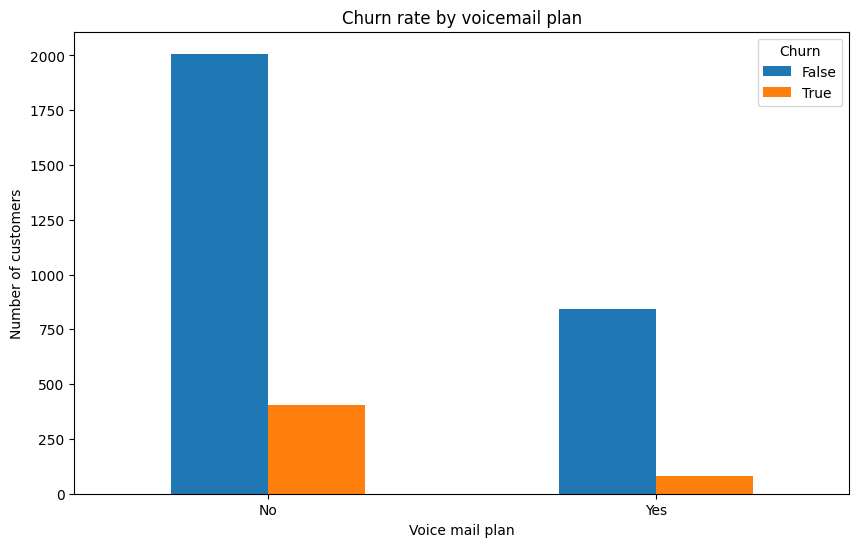

In [ ]:
#bar plot

voicemailshow = voicemailchurn.plot.bar(figsize=(10,6))
plt.xticks(rotation = 360)
plt.title('Churn rate by voicemail plan')
plt.xlabel('Voice mail plan')
plt.ylabel('Number of customers')
plt.show()


**Observation:**\
number of customers are more in non churned rate by voicemail plan as compared to churned rate by voice mail plan.

**6.Checking the churn customers who are having both international and voice mail plan**

In [ ]:
voiceandint = df[(df['International plan']=='Yes') & (df['Voice mail plan']=='Yes')]
print("Number of customers with 'International plan' and 'Voice mail plan' activated :", len(voiceandint))

voiceandint1 = df[(df['International plan']=='Yes') & (df['Voice mail plan']=='No')]
print("Number of customers with 'International plan' activated and 'Voice mail plan' not activated :", len(voiceandint1))

voiceandint2 = df[(df['International plan']=='No') & (df['Voice mail plan']=='Yes')]
print("Number of customers without 'International plan' activated and 'Voice mail plan' activated :", len(voiceandint2))

voiceandint3 = df[(df['International plan']=='No') & (df['Voice mail plan']=='No')]
print("Number of customers without 'International plan' and 'Voice mail plan' activated :", len(voiceandint3))

Number of customers with 'International plan' and 'Voice mail plan' activated : 92
Number of customers with 'International plan' activated and 'Voice mail plan' not activated : 231
Number of customers without 'International plan' activated and 'Voice mail plan' activated : 830
Number of customers without 'International plan' and 'Voice mail plan' activated : 2180


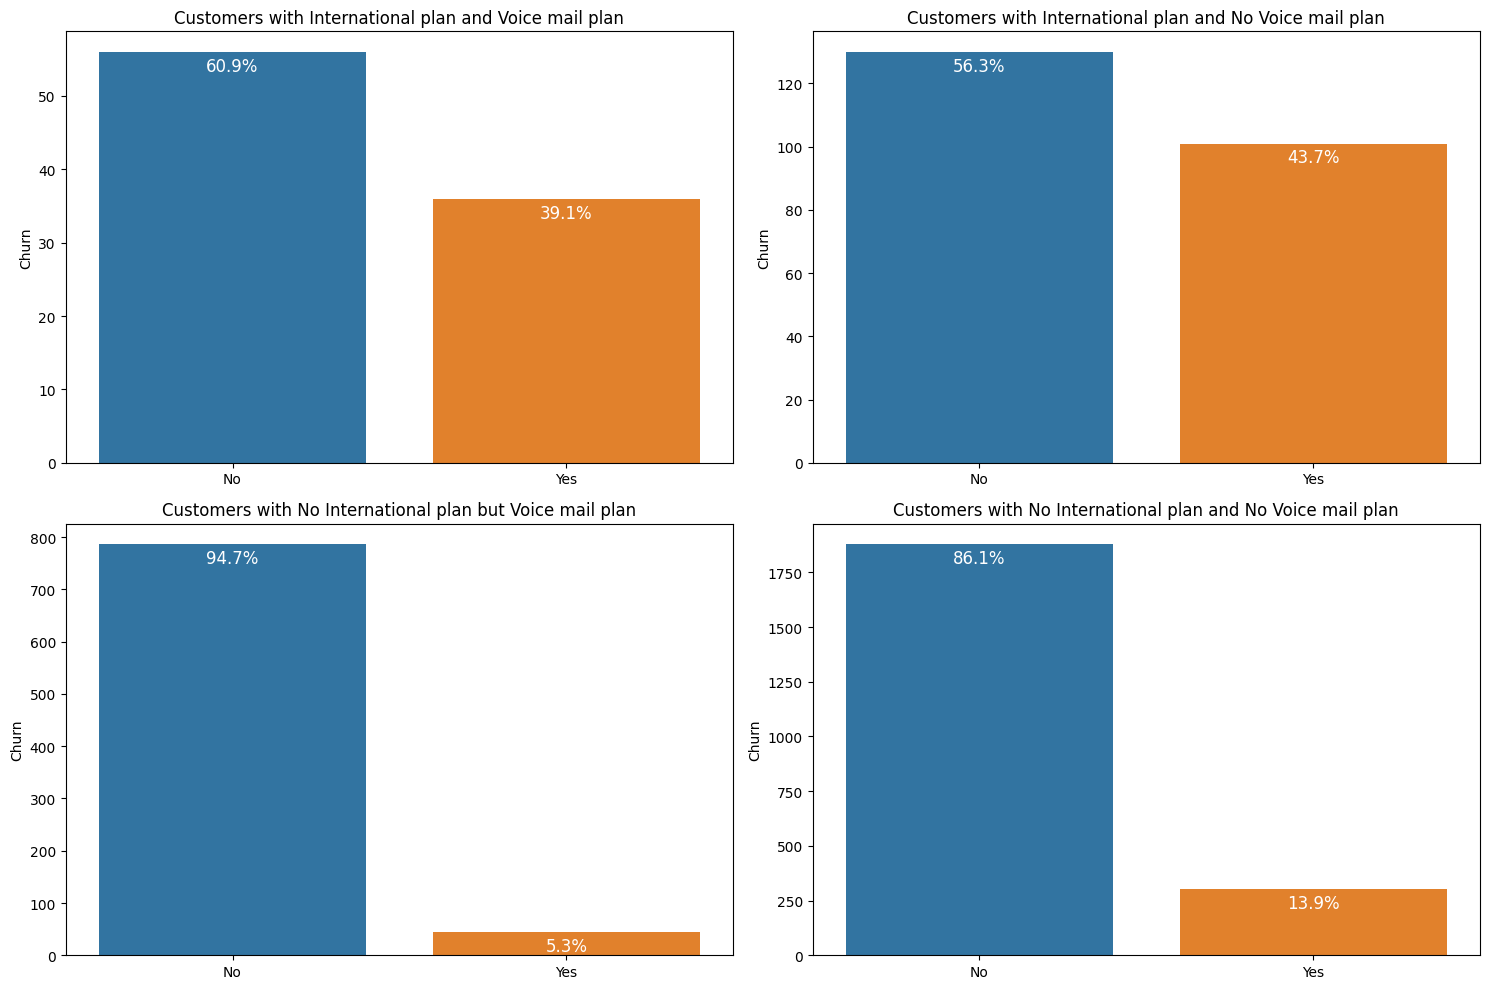

In [ ]:
plt.figure(figsize = (15,10))

data = [voiceandint, voiceandint1, voiceandint2, voiceandint3]
titles = ["Customers with International plan and Voice mail plan",
          "Customers with International plan and No Voice mail plan",
          "Customers with No International plan but Voice mail plan",
          "Customers with No International plan and No Voice mail plan"]

for i in range(4):
    plt.subplot(2,2,i+1)

    ax = sns.barplot(x = data[i]['Churn'].map({True: 'Yes', False: 'No'}).value_counts().index,
                     y = data[i]['Churn'].value_counts())

    total = data[i]['Churn'].value_counts().sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center',
                    size=12, xytext=(0, -10), textcoords='offset points', color='white')

    plt.title(titles[i], fontsize = 12)

plt.tight_layout()
plt.show()

**Observation :**\
**Case 1 :** 60.9% churned Customer with International plan and voice mail plan compared to 39.1%.

**case 2 :** 56.3% churned Customer with has International plan and No voice mail plan compared to 43.7%.

**case 3 :** 94.7% churned Customer with No International plan but voice mail plan comapared to 5.3%.

**case 4 :** 86.1% churned customer with no international plan and no voice mail plan compared to 13.9%.

\
The churn is most to the customer who dont have international plan but have voice mail plan





**7. State vs Average churn percentage**

In [ ]:
churn_rate = df.groupby('State')['Churn'].mean() * 100
churn_rate = churn_rate.round(2)
top_10_states = churn_rate.sort_values(ascending=False)

top_10_states.reset_index()

,State,Churn
0,NJ,26.47
1,CA,26.47
2,TX,25.00
3,MD,24.29
4,SC,23.33
5,MI,21.92
6,MS,21.54
7,NV,21.21
8,WA,21.21
9,ME,20.97


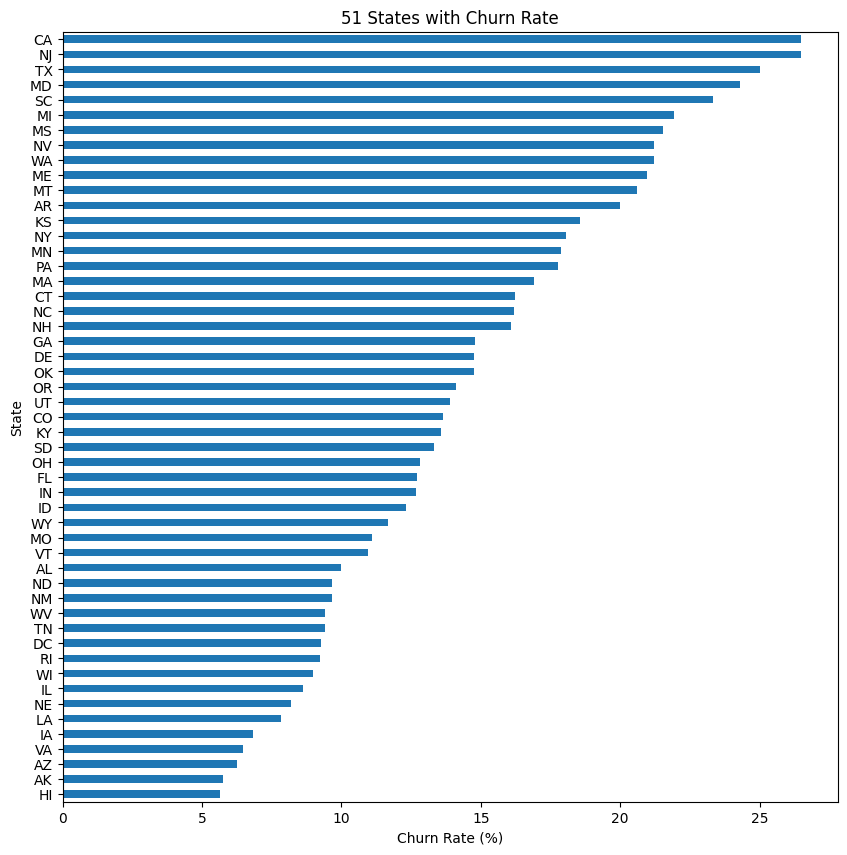

In [ ]:
top_10_states = churn_rate
top_10_states = churn_rate.sort_values(ascending=True)

top_10_states.plot(kind='barh', figsize=(10, 10))
plt.title('51 States with Churn Rate')
plt.xlabel('Churn Rate (%)')
plt.ylabel('State')
plt.show()


**Top 10 highest churn rate states**

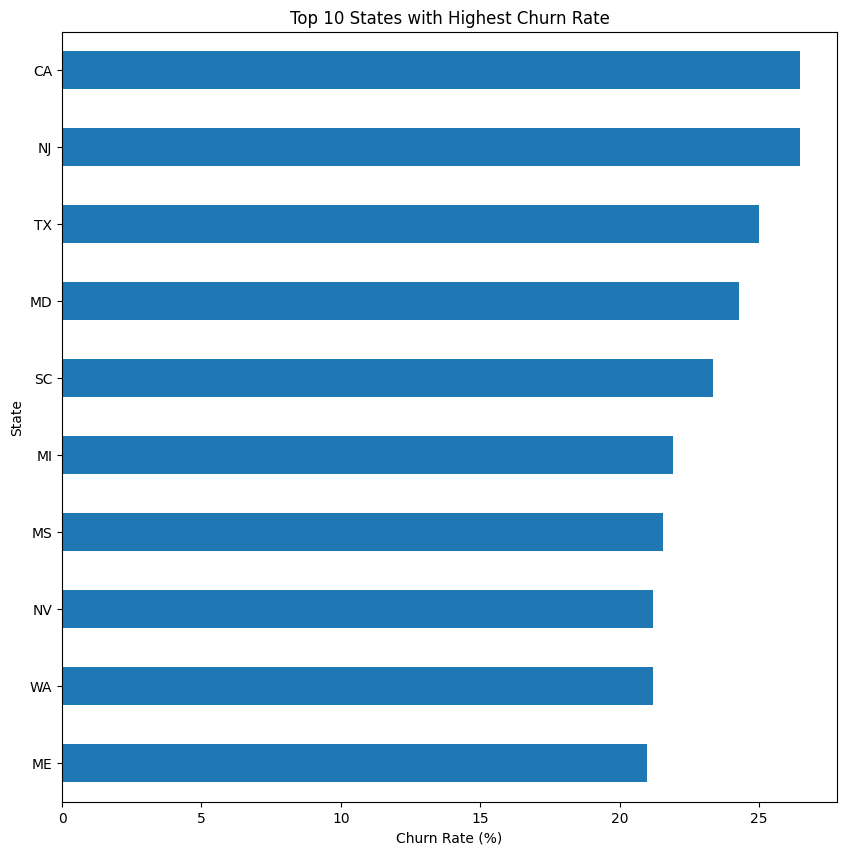

In [ ]:
top_10_states = churn_rate.sort_values().tail(10)
top_10_states.plot(kind='barh', figsize=(10, 10))
plt.title('Top 10 States with Highest Churn Rate')
plt.xlabel('Churn Rate (%)')
plt.ylabel('State')
plt.show()


**Top 10 states with lowest churn rate**

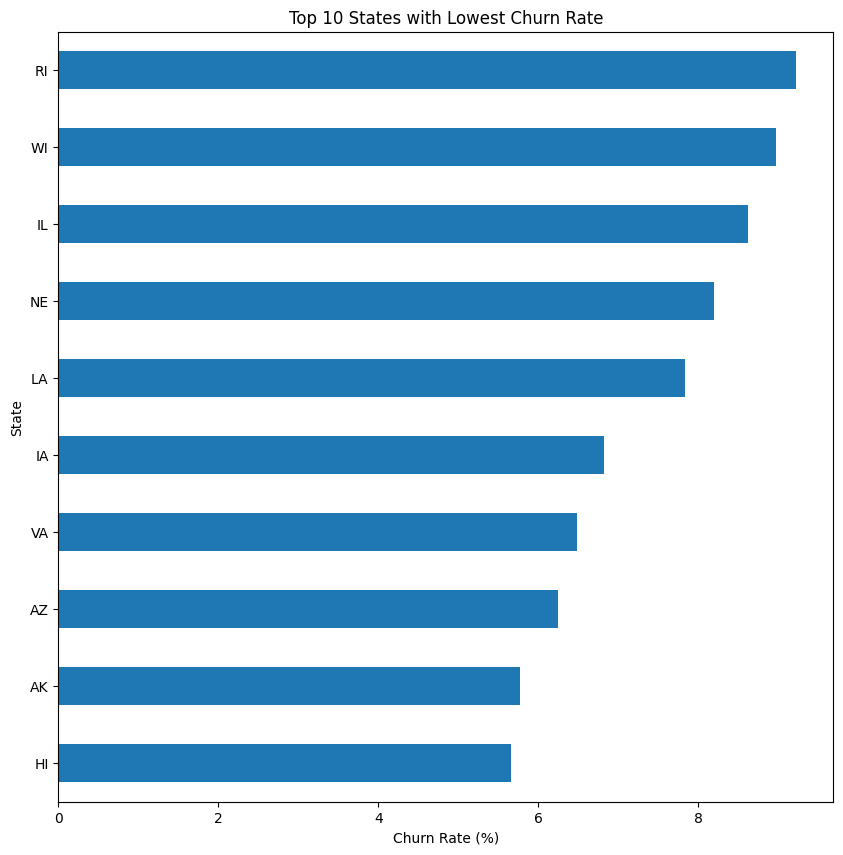

In [ ]:
top_10_states = churn_rate.sort_values().head(10)
top_10_states.plot(kind='barh', figsize=(10, 10))
plt.title('Top 10 States with Lowest Churn Rate')
plt.xlabel('Churn Rate (%)')
plt.ylabel('State')
plt.show()


**Observation**\
There are 51 states having different churn rates.

**CA**, **NJ**, **TX**, **MD**, **SC**, **MI**, **MS**, **NV**, **WA**, **ME** are the highes top 10 state with churn rate.\
**RI**, **WI**, **IL**, **NE**, **LA**, **IA**, **VA**, **AZ**, **AK**, **HI** are the lowest top 10 state with churn rate.

**8. Account length**

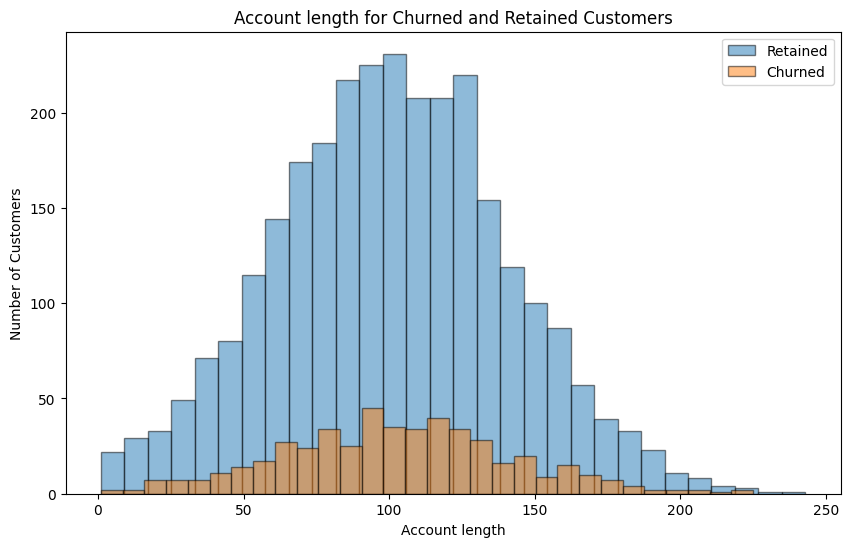

In [ ]:
plt.figure(figsize=(10,6))

# Histogram for retained customers (Churn == 0)
plt.hist(df[df['Churn'] == 0]['Account length'], bins = 30, label='Retained', alpha=0.5, edgecolor='black')
# Histogram for churned customers (Churn == 1)
plt.hist(df[df['Churn'] == 1]['Account length'], bins = 30, label='Churned', alpha=0.5, edgecolor='black')

plt.title('Account length for Churned and Retained Customers')
plt.xlabel('Account length')
plt.ylabel('Number of Customers')
plt.legend(loc='best')
plt.show()

**Observation** \
below 50 are the number of customers who churned the company as they maybe not happy with the service or were just trying services.
there could be many outcome for churned.
1.   Poor serrvice
2.   No satisfactory offers
3.   High charges

The highest number of customer from the range of 150 to 200 are customer with account length 100 is the oldest and loyal customer who is happy with the services.




**9.Call charges of day, eveninig and night**

In [ ]:
print(df[['Total day charge', 'Total eve charge', 'Total night charge']].sum())


Total day charge      101864.17
Total eve charge       56939.44
Total night charge     30128.07
dtype: float64


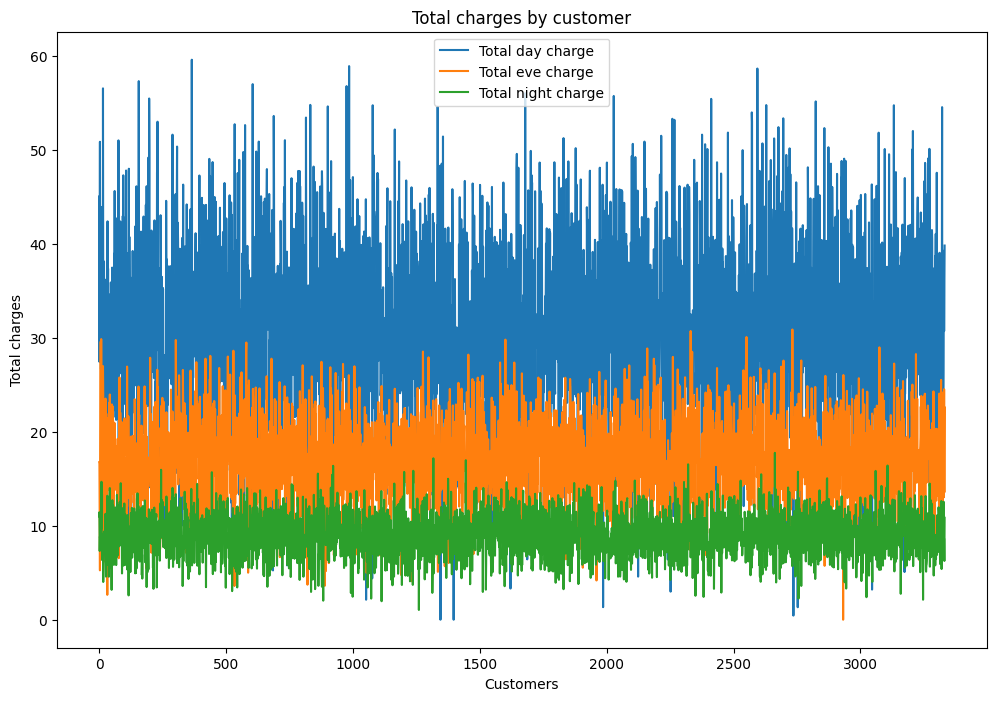

In [ ]:

plt.figure(figsize=(12, 8))

plt.plot(df['Total day charge'], label='Total day charge')
plt.plot(df['Total eve charge'], label='Total eve charge')
plt.plot(df['Total night charge'], label='Total night charge')

plt.xlabel('Customers')
plt.ylabel('Total charges')
plt.title('Total charges by customer')
plt.legend()
plt.show()


**Observation**\
Result shows that charges are Higher in day and lowest charges are at night.

**10. Overall calls in day**

In [ ]:
overallcalls_day = df.groupby(['Churn'])['Total day minutes','Total day calls','Total day charge'].mean()
overallcalls_day

,Total day minutes,Total day calls,Total day charge
Churn,,,
False,175.175754,100.283158,29.780421
True,206.914079,101.335404,35.175921


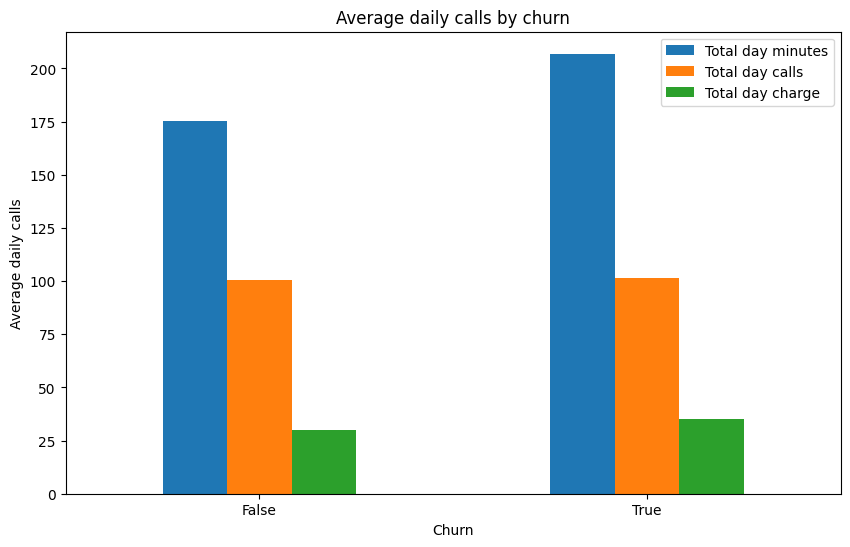

In [ ]:

overallcalls_day.plot(kind='bar', figsize=(10,6))
plt.title('Average daily calls by churn')
plt.xticks(rotation = 360)
plt.xlabel('Churn')
plt.ylabel('Average daily calls')
plt.show()


**Observation**\
Average daily calls in day minutes by churned customers is less compared to non churned customer.

**11. Overall calls in evening**

In [ ]:
overallcalls_eve = df.groupby(['Churn'])['Total eve minutes','Total eve calls','Total eve charge'].mean()
overallcalls_eve

,Total eve minutes,Total eve calls,Total eve charge
Churn,,,
False,199.043298,100.038596,16.918909
True,212.410145,100.561077,18.054969


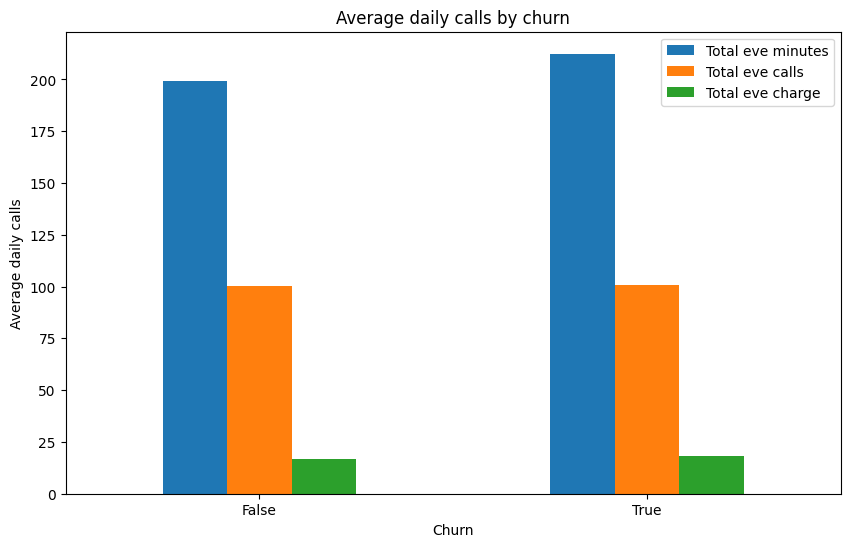

In [ ]:
overallcalls_eve.plot(kind='bar', figsize=(10,6))
plt.title('Average daily calls by churn')
plt.xticks(rotation = 360)
plt.xlabel('Churn')
plt.ylabel('Average daily calls')
plt.show()

**12. Overall calls in night**

In [ ]:
overallcalls_night = df.groupby(['Churn'])['Total night minutes','Total night calls','Total night charge'].mean()
overallcalls_night

,Total night minutes,Total night calls,Total night charge
Churn,,,
False,200.133193,100.058246,9.006074
True,205.231677,100.399586,9.235528


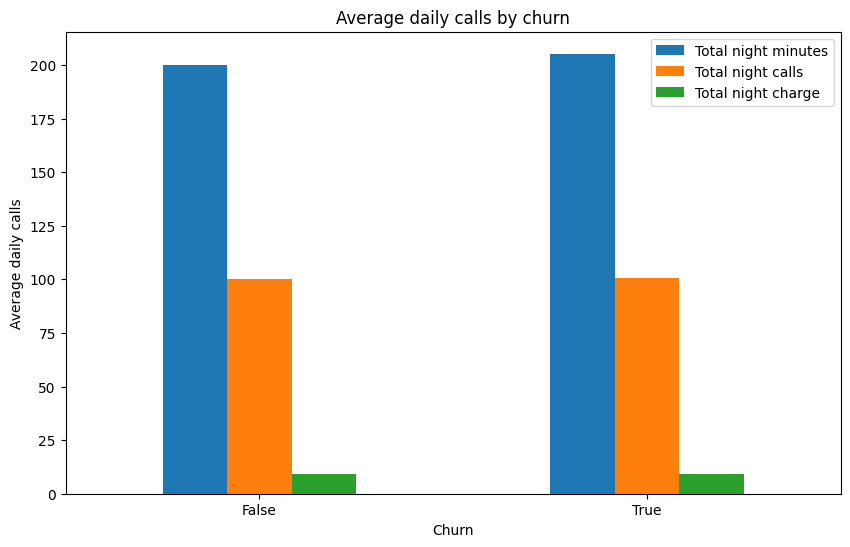

In [ ]:
overallcalls_night.plot(kind='bar', figsize=(10,6))
plt.title('Average daily calls by churn')
plt.xticks(rotation = 360)
plt.xlabel('Churn')
plt.ylabel('Average daily calls')
plt.show()

**13. Average calls of total day calls, evening calls & night calls**

In [ ]:
avg_calls = df.groupby(['Churn'])['Total day calls','Total eve calls','Total night calls'].mean().T
avg_calls

Churn,False,True
Total day calls,100.283158,101.335404
Total eve calls,100.038596,100.561077
Total night calls,100.058246,100.399586


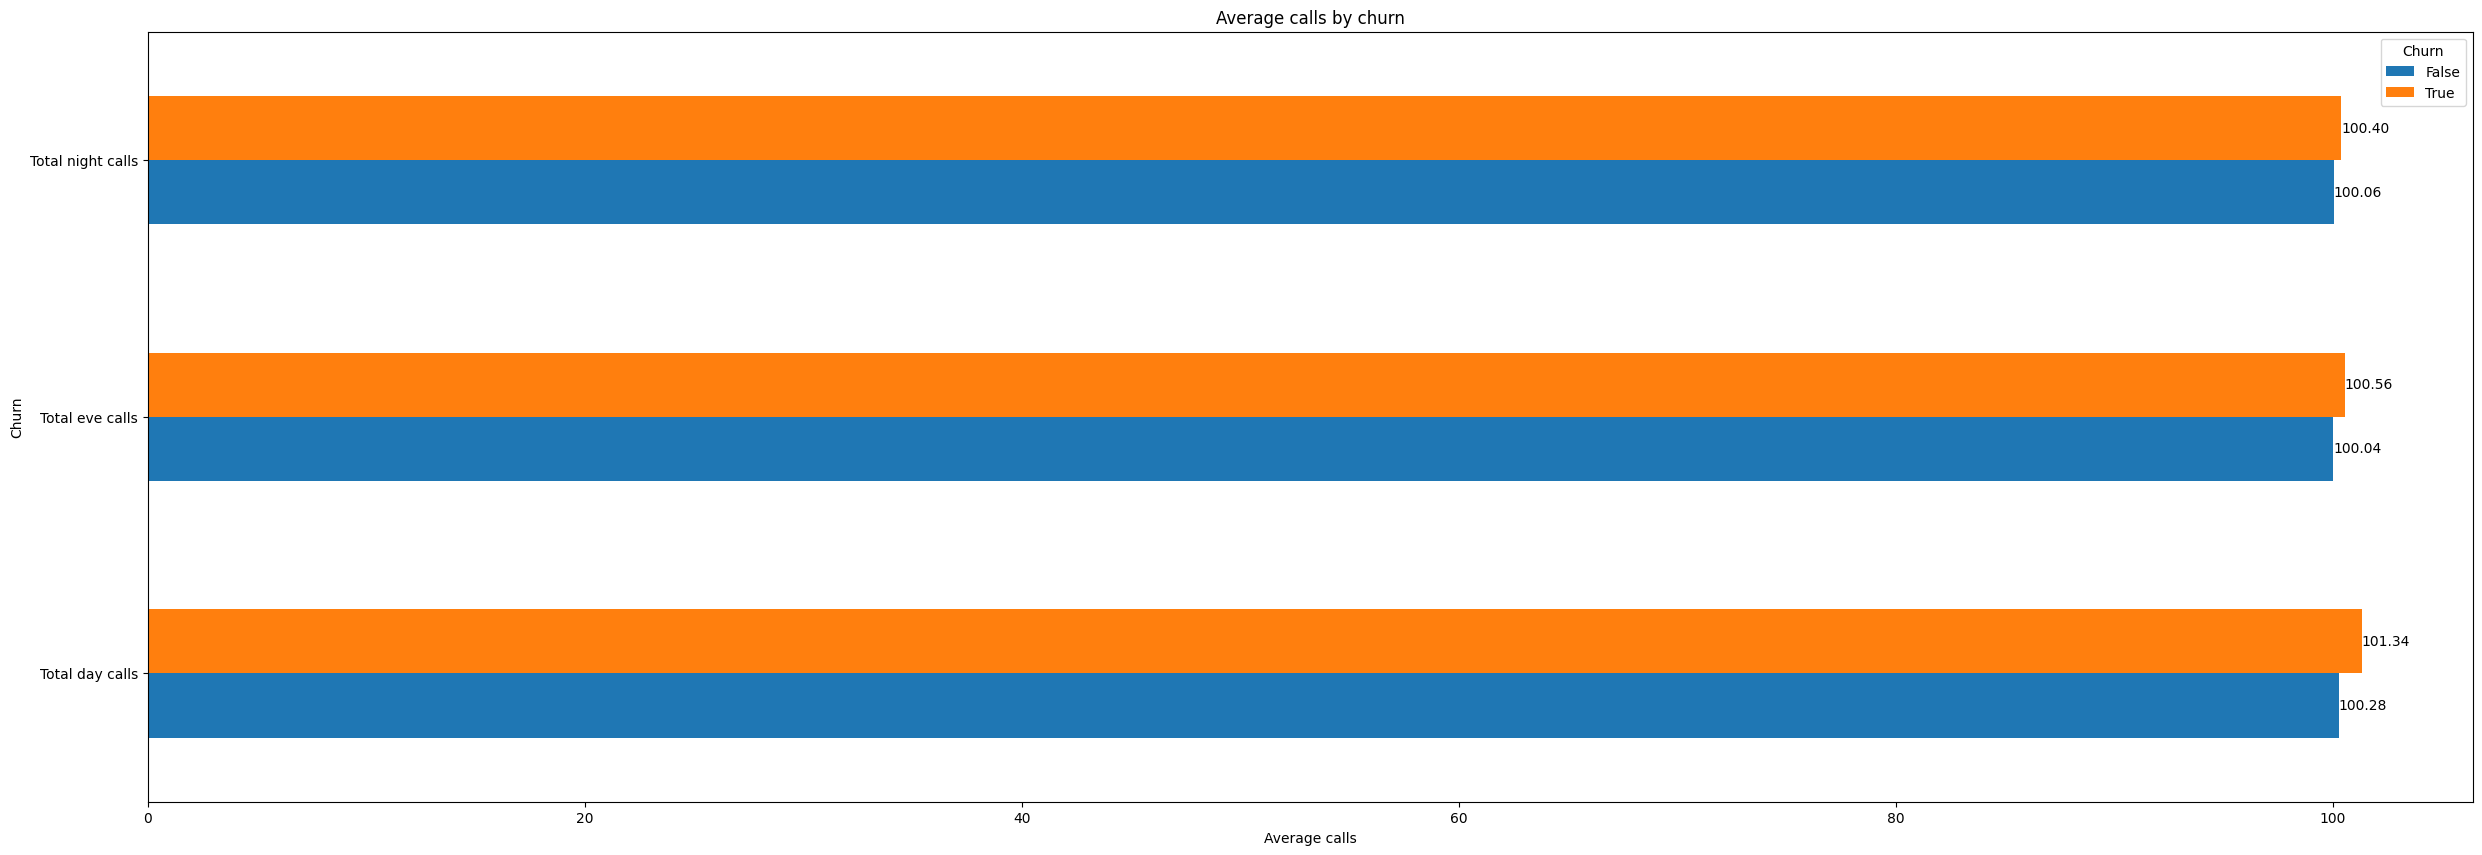

In [ ]:
bars = avg_calls.plot(kind='barh', figsize=(30,10))

for bar in bars.patches:
    width = bar.get_width()
    bars.text(width,
            bar.get_y() + bar.get_height()/2,
            '{:.2f}'.format(width),  # Here you can change to "{:.0f}".format(width) for integer
            ha='left',
            va='center')

plt.title('Average calls by churn')
plt.ylabel('Churn')
plt.xlabel('Average calls')
plt.show()

**Observation**



Both churned and non churned customers has very minor average calls difference in day, eve and night calls.




**14. Customer service calls**

In [ ]:
customer_service = ((df.groupby(['Customer service calls'])['Churn'].mean())*100).reset_index()
customer_service



,Customer service calls,Churn
0,0,13.199426
1,1,10.330229
2,2,11.462451
3,3,10.256410
4,4,45.783133
5,5,60.606061
6,6,63.636364
7,7,55.555556
8,8,50.000000
9,9,100.000000


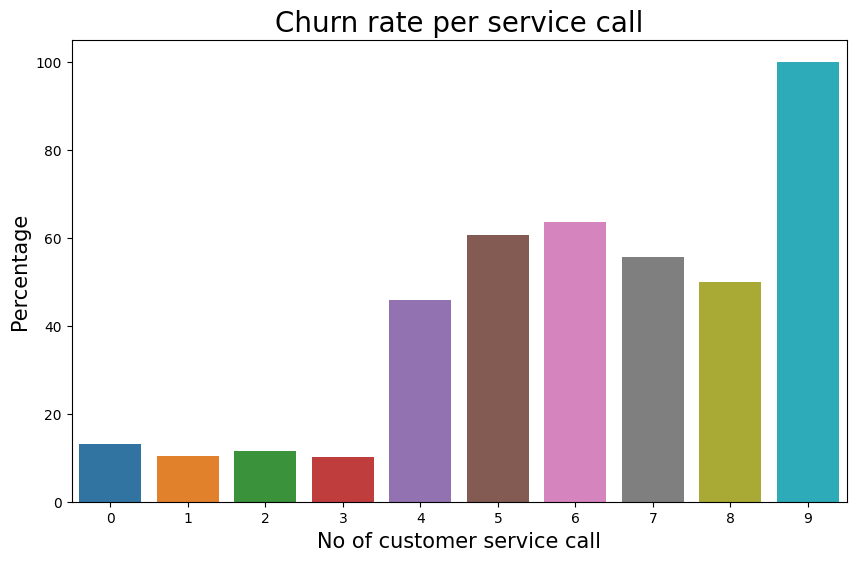

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data = customer_service, x='Customer service calls', y='Churn')
plt.title("Churn rate per service call", fontsize=20)
plt.xlabel("No of customer service call", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.show()

**Observation**\
The service cell per customer varies from 0 to 9.\
Customer with high service calls have highest chance of leaving.\
From the graph its clearly visible that customer who have make more than 5 calls their churn rate is high.\
Customers who make more service calls their problem must be sort out as soon as possible and they should be getting better service so they dont leave the company.


# **Conclusion**

*   churned and non churned customers has very minor average calls difference in day, eve and night calls.
*   Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers.
*   Total day charges should be less so there will be less churned.
*   Cusomer support should be good and customer should get exciting offers so they will stick to the company for the longer time.
*   Customers with the International Plan tend to churn more frequently.
*   Customers with five or more customer service calls churn more than four times as often as do the other customers.





# **Github** -
https://github.com/sumeetbabar2809/Telecom-churn-analysis/blob/main/Telecomchumipynb.ipynb